In [108]:
import os
import sys
sys.path.append(os.path.abspath('..'))

In [109]:
from src.data.load_data import load_movielens
from src.EDA.data_overview import Inspector,ViewData,TypeInspector,StatsInspector
from src.EDA.univatiate import AutoUnivariateAnalyzer
from src.EDA.bivariate import BivariateAnalyzer, CategoricalVsNumericalAnalysis, NumericalVsNumericalAnalysis

import datetime as dt
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [110]:

ratings = pd.read_csv(r'C:\Users\sarva\MoviePulse\data\processed\ratings_clean.csv')
movies = pd.read_csv(r'C:\Users\sarva\MoviePulse\data\processed\movies_clean.csv')

data ={'movies' : movies , 'ratings' : ratings}

In [111]:
see_data = Inspector(ViewData())
see_data.inspect(ratings)



- Shape : (100836, 4)
Sample of :
    userId  movieId  rating            timestamp
0       1        1     4.0  2000-07-30 18:45:03
1       1        3     4.0  2000-07-30 18:20:47
2       1        6     4.0  2000-07-30 18:37:04
3       1       47     5.0  2000-07-30 19:03:35
4       1       50     5.0  2000-07-30 18:48:51


In [112]:
see_data.inspect(movies)


- Shape : (9742, 5)
Sample of :
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  imdbId   tmdbId  
0  ['Adventure', 'Animation', 'Children', 'Comedy...  114709    862.0  
1               ['Adventure', 'Children', 'Fantasy']  113497   8844.0  
2                              ['Comedy', 'Romance']  113228  15602.0  
3                     ['Comedy', 'Drama', 'Romance']  114885  31357.0  
4                                         ['Comedy']  113041  11862.0  


In [113]:
see_data.use(TypeInspector())
see_data.inspect(movies)


Column Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   title    9742 non-null   object 
 2   genres   9742 non-null   object 
 3   imdbId   9742 non-null   int64  
 4   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 380.7+ KB


In [114]:
see_data.inspect(ratings)


Column Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


In [115]:
see_data.use(StatsInspector())
see_data.inspect(movies)


Numerical Stats:
             movieId        imdbId         tmdbId
count    9742.000000  9.742000e+03    9734.000000
mean    42200.353623  6.771839e+05   55162.123793
std     52160.494854  1.107228e+06   93653.481487
min         1.000000  4.170000e+02       2.000000
25%      3248.250000  9.518075e+04    9665.500000
50%      7300.000000  1.672605e+05   16529.000000
75%     76232.000000  8.055685e+05   44205.750000
max    193609.000000  8.391976e+06  525662.000000

Categorical Stats:
              title     genres
count          9742       9742
unique         9737        951
top     Emma (1996)  ['Drama']
freq              2       1053


In [116]:
see_data.inspect(ratings)


Numerical Stats:
              userId        movieId         rating
count  100836.000000  100836.000000  100836.000000
mean      326.127564   19435.295718       3.501557
std       182.618491   35530.987199       1.042529
min         1.000000       1.000000       0.500000
25%       177.000000    1199.000000       3.000000
50%       325.000000    2991.000000       3.500000
75%       477.000000    8122.000000       4.000000
max       610.000000  193609.000000       5.000000

Categorical Stats:
                  timestamp
count                100836
unique                85043
top     2016-04-04 16:39:58
freq                    128


In [117]:
print(f"Missing Values in Movies: " , movies.isna().sum())
print(f"Missing Values in Ratings: " , ratings.isna().sum())

Missing Values in Movies:  movieId    0
title      0
genres     0
imdbId     0
tmdbId     8
dtype: int64
Missing Values in Ratings:  userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [118]:
print(f"Duplicate values in movies: " , movies.duplicated().sum())
print(f"Duplicate values in ratings: " , ratings.duplicated().sum())

Duplicate values in movies:  0
Duplicate values in ratings:  0


### Analyse Genres columns

In [119]:
import ast

movies['genres'] = movies['genres'].apply(ast.literal_eval)


In [120]:
genres_exploded = movies.explode('genres')
genres_exploded

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure,114709,862.0
0,1,Toy Story (1995),Animation,114709,862.0
0,1,Toy Story (1995),Children,114709,862.0
0,1,Toy Story (1995),Comedy,114709,862.0
0,1,Toy Story (1995),Fantasy,114709,862.0
...,...,...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy,5914996,445030.0
9739,193585,Flint (2017),Drama,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,8391976,483455.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,8391976,483455.0


In [121]:
genres_count = genres_exploded['genres'].value_counts().reset_index()
genres_count.columns = ['genre' , 'Number of Movies']
print(genres_count)

                 genre  Number of Movies
0                Drama              4361
1               Comedy              3756
2             Thriller              1894
3               Action              1828
4              Romance              1596
5            Adventure              1263
6                Crime              1199
7               Sci-Fi               980
8               Horror               978
9              Fantasy               779
10            Children               664
11           Animation               611
12             Mystery               573
13         Documentary               440
14                 War               382
15             Musical               334
16             Western               167
17                IMAX               158
18           Film-Noir                87
19  (no genres listed)                34


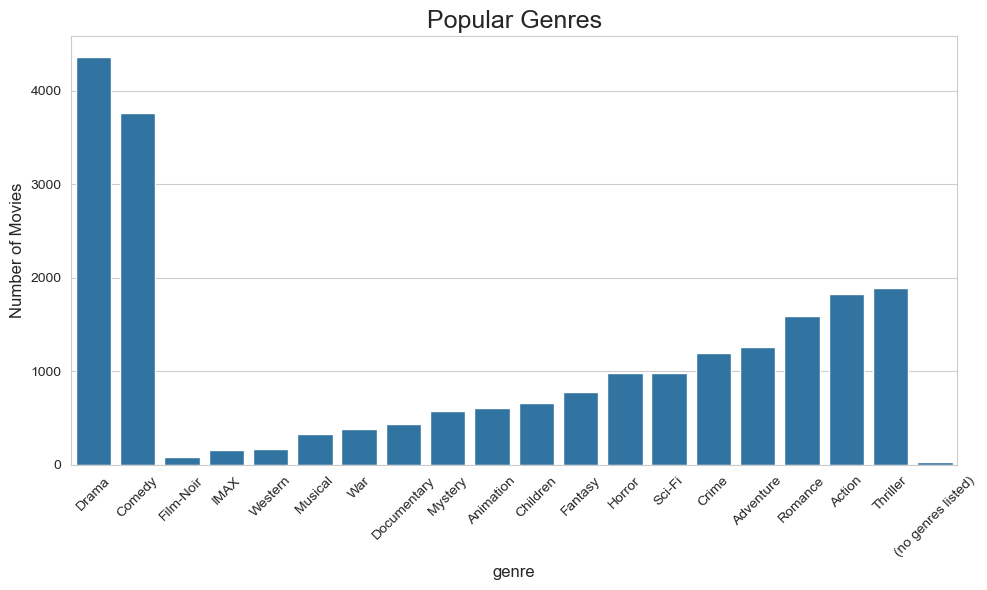

In [122]:
bivariate = BivariateAnalyzer(CategoricalVsNumericalAnalysis())
bivariate.execute_analysis(genres_count, 'genre' , 'Number of Movies' , plot_type='bar', title="Popular Genres")

The most number of movies are made in the genre of  Drama and Comedy followed by Triller, Action and Romance

### Average Rating By Genre

In [123]:
rating_genre = pd.merge(ratings, genres_exploded[['movieId' , 'genres']] , on='movieId')

avg_ratings_per_genre = rating_genre.groupby('genres')['rating'].mean().sort_values(ascending=False).reset_index()
avg_ratings_per_genre.columns = ['Genre', 'Average Rating']
print(avg_ratings_per_genre)

                 Genre  Average Rating
0            Film-Noir        3.920115
1                  War        3.808294
2          Documentary        3.797785
3                Crime        3.658294
4                Drama        3.656184
5              Mystery        3.632460
6            Animation        3.629937
7                 IMAX        3.618335
8              Western        3.583938
9              Musical        3.563678
10           Adventure        3.508609
11             Romance        3.506511
12            Thriller        3.493706
13             Fantasy        3.491001
14  (no genres listed)        3.489362
15              Sci-Fi        3.455721
16              Action        3.447984
17            Children        3.412956
18              Comedy        3.384721
19              Horror        3.258195


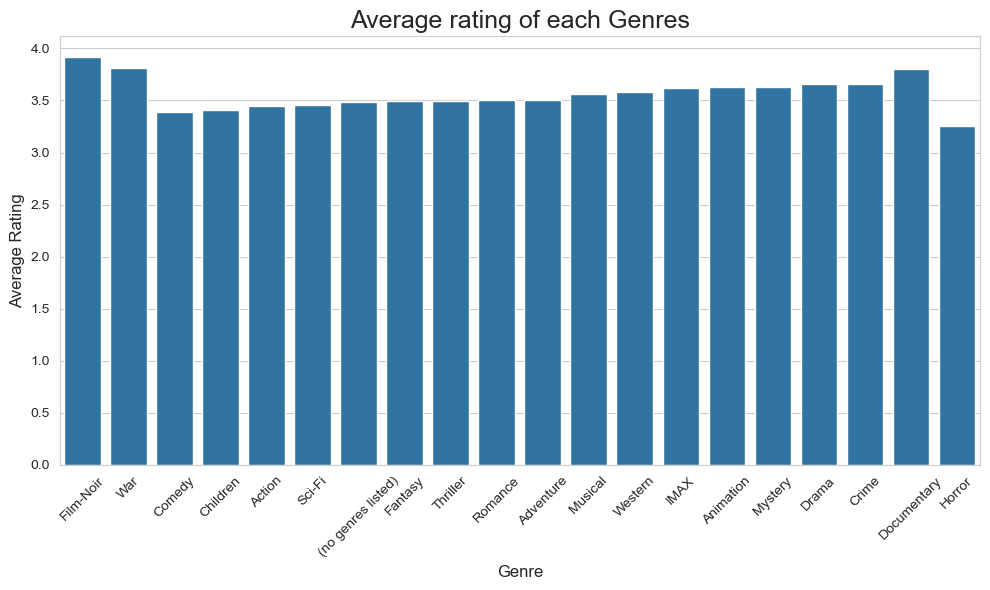

In [124]:
bivariate.execute_analysis(avg_ratings_per_genre, 'Genre','Average Rating', plot_type='bar', title='Average rating of each Genres')

In Above graph average rating of Film-Noir is high but the movies made in the genre of Film-Nair is also very less and most of the genres have same rating in the range between 3.3 to 4  


Descriptive Statistics for Numerical Feature: rating
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


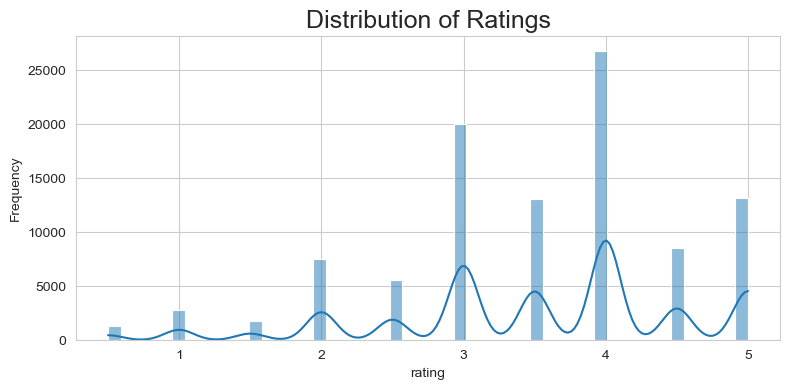

In [125]:
uni=AutoUnivariateAnalyzer()
uni.analyze(ratings , 'rating', title='Distribution of Ratings')

The tallest bars are at ratings like 4.0, 3.0, 5.0, which means users often rate movies with round numbers.

Rating 4.0 is the most common:

Over 25,000+ ratings are at 4.0, making it the peak rating.

Rating 3.0 is the second most common, followed by 5.0 and 2.0.

The KDE line has many peaks, which is a bit unusual — it shows many local maxima, possibly because of repeated values and not a smooth continuous distribution.

In [126]:
print("Unique ratings : "  , ratings['rating'].nunique())
print("Rating value counts : " , ratings['rating'].value_counts().sort_index())
print("Basic Statistics : " ,ratings['rating'].describe() )

Unique ratings :  10
Rating value counts :  rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64
Basic Statistics :  count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


### Average Rating Per Movies

In [127]:
movie_avg=ratings.groupby('movieId')['rating'].mean().reset_index()
movie_avg.columns = ['movieId' , 'avg_rating']
movie_avg.sort_values('avg_rating', ascending=False)
movie_avg = movie_avg.merge(movies[['movieId' , 'title']] , on= 'movieId')
movie_avg.head()

,movieId,avg_rating,title
0,1,3.920930,Toy Story (1995)
1,2,3.431818,Jumanji (1995)
2,3,3.259615,Grumpier Old Men (1995)
3,4,2.357143,Waiting to Exhale (1995)
4,5,3.071429,Father of the Bride Part II (1995)


In [128]:

rating_counts = ratings.groupby('movieId')['rating'].count().reset_index()
rating_counts.columns = ['movieId', 'num_ratings']


movie_stats = movie_avg.merge(rating_counts, on='movieId')
popular_movies = movie_stats[movie_stats['num_ratings'] >= 50]

top_movies = popular_movies.sort_values(by='avg_rating' , ascending= False).head(10)
print(top_movies)
print(rating_counts)
print(movie_stats)


      movieId  avg_rating                                              title  \
277       318    4.429022                   Shawshank Redemption, The (1994)   
659       858    4.289062                              Godfather, The (1972)   
2224     2959    4.272936                                  Fight Club (1999)   
974      1276    4.271930                              Cool Hand Luke (1967)   
602       750    4.268041  Dr. Strangelove or: How I Learned to Stop Worr...   
686       904    4.261905                                 Rear Window (1954)   
921      1221    4.259690                     Godfather: Part II, The (1974)   
6298    48516    4.252336                               Departed, The (2006)   
913      1213    4.250000                                  Goodfellas (1990)   
694       912    4.240000                                  Casablanca (1942)   

      num_ratings  
277           317  
659           192  
2224          218  
974            57  
602            97  

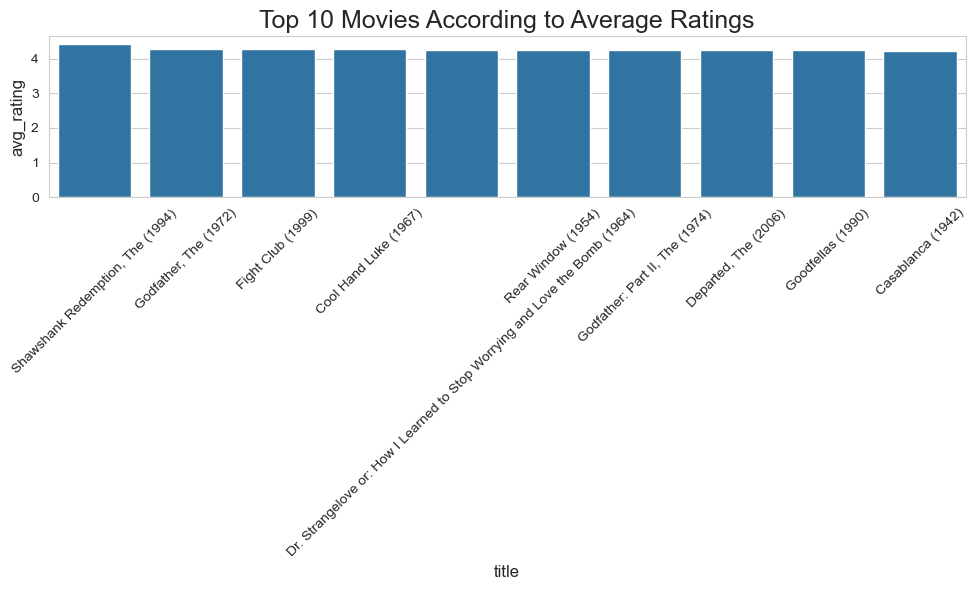

In [129]:
bivariate.execute_analysis(top_movies , 'title', 'avg_rating'  , plot_type='bar', title='Top 10 Movies According to Average Ratings')

The Above Graph Shows top 10 movies according to there ratings:<br>
1).Shawshank Redemption, The (1994)<br>
2).Godfather, The (1972)<br>
3).Fight Club (1999)	<br>
4).Cool Hand Luke (1967)	<br>
5).Dr. Strangelove or: How I Learned to Stop Worrying and love the bomb<br>
6).Rear Window (1954)	<br>
7).Godfather: Part II, The (1974)<br>
8).Departed, The (2006)<br>
9).Goodfellas (1990)<br>
10).Casablanca (1942)



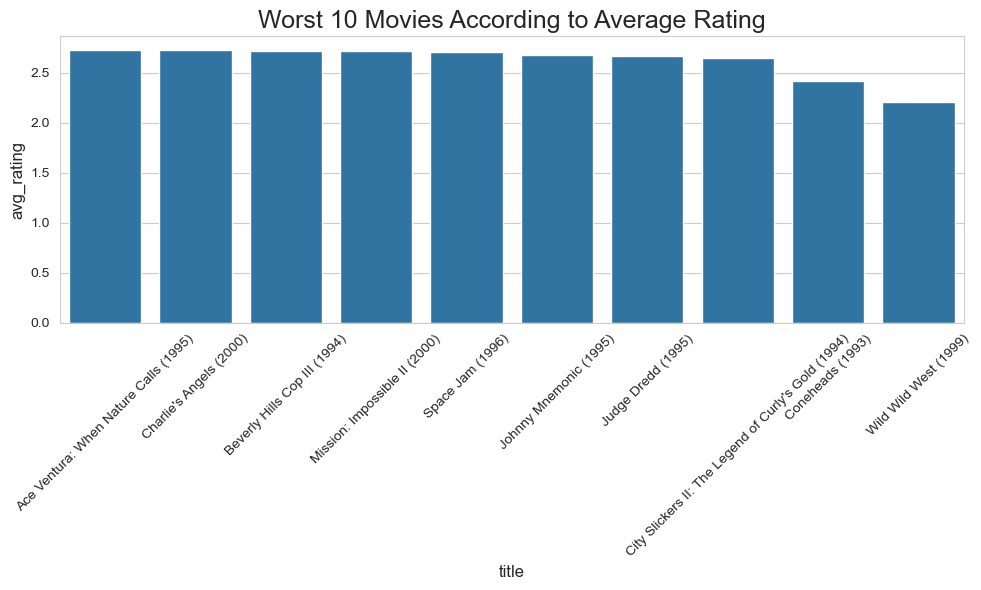

In [130]:
worst_movies = popular_movies.sort_values(by='avg_rating' , ascending= False).tail(10)
bivariate.execute_analysis(worst_movies, 'title' , 'avg_rating', plot_type = 'bar', title='Worst 10 Movies According to Average Rating')


### User Average Rating

In [131]:
user_avg = ratings.groupby('userId')['rating'].mean().reset_index()
user_avg.columns = ['userId' , 'avg_rating']
user_avg

,userId,avg_rating
0,1,4.366379
1,2,3.948276
2,3,2.435897
3,4,3.555556
4,5,3.636364
...,...,...
605,606,3.657399
606,607,3.786096
607,608,3.134176
608,609,3.270270



Descriptive Statistics for Numerical Feature: avg_rating
count    610.000000
mean       3.657222
std        0.480635
min        1.275000
25%        3.360000
50%        3.694385
75%        3.997500
max        5.000000
Name: avg_rating, dtype: float64


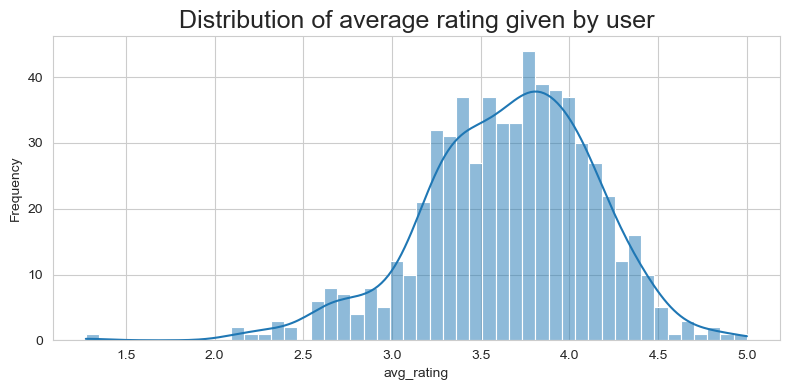

In [132]:
uni.analyze(user_avg , 'avg_rating',title = 'Distribution of average rating given by user')

The User Reviews are distributed through 0.5 to 5.0 that means the user are not generous user is giving harsh review as well

In [133]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


In [134]:
movies.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",113497,8844.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",113228,15602.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",114885,31357.0
4,5,Father of the Bride Part II (1995),[Comedy],113041,11862.0


### RATINGS PER DAY

In [135]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])
ratings['Date'] = ratings['timestamp'].dt.date
ratings_per_day=ratings.groupby('Date').size().reset_index(name ='count')

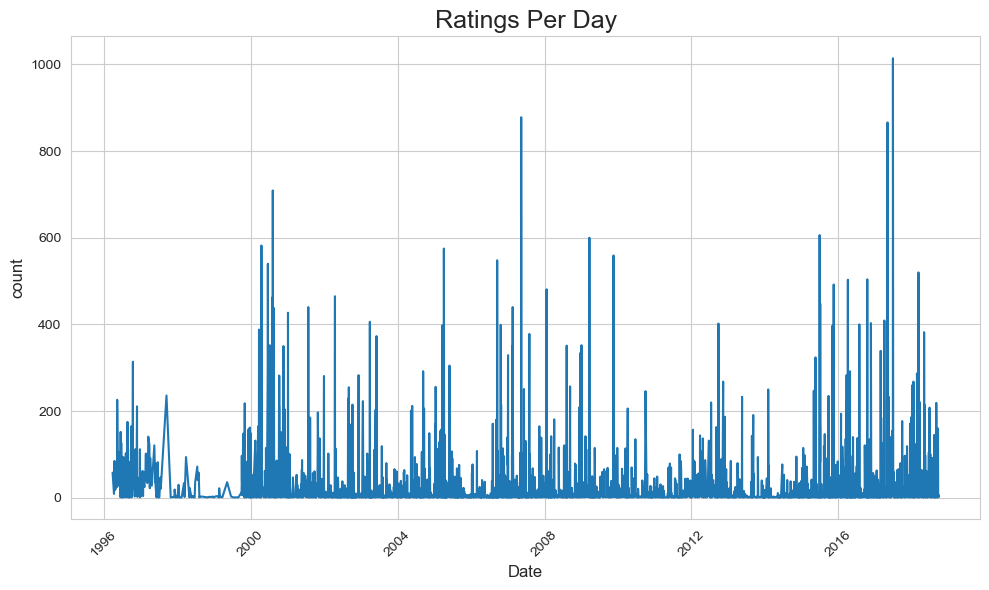

In [136]:
bivariate.execute_analysis(ratings_per_day, 'Date', 'count', plot_type='line', title="Ratings Per Day")

"The number of movie ratings per day shows a clear upward trend over time, with notable spikes during specific periods. These patterns reflect the platform’s growth, user engagement surges, and possibly external influences like promotions or feature rollouts. Rating activity became consistently high post-2000, with a second significant rise in the mid-2010s."



1995–1999:
Rating activity was low and irregular, indicating that the platform or data collection system likely had fewer users or incomplete coverage in its early phase.

2000–2008:
A noticeable increase in user engagement with frequent spikes in daily rating counts. This likely reflects the platform's growth in popularity or improvements in data recording.

2009–2013:
Rating activity became more stable and consistent, with fewer extreme peaks but still high engagement. This suggests a mature user base and regular usage during this period.

2014–2017+:
Another sharp increase in activity, with distinct spikes. This could be due to:

A surge in new users

Marketing campaigns

Integration with other platforms or services

### RATINGS PER MONTH

In [137]:

ratings['YearMonth'] = ratings['timestamp'].dt.to_period('M')
avg_ratings_per_month=ratings.groupby('YearMonth')['rating'].mean().reset_index(name ='count')
avg_ratings_per_month['YearMonth'] = avg_ratings_per_month['YearMonth'].dt.to_timestamp()
avg_ratings_per_month.head()

,YearMonth,count
0,1996-03-01,3.982759
1,1996-04-01,3.739394
2,1996-05-01,3.514423
3,1996-06-01,3.540204
4,1996-07-01,3.695297


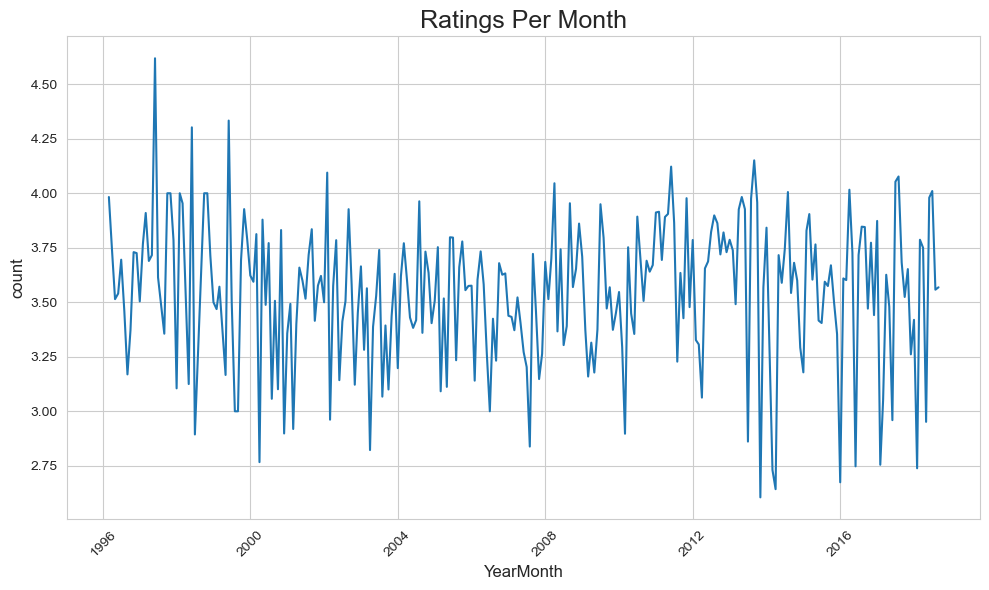

In [138]:

bivariate.execute_analysis(avg_ratings_per_month, 'YearMonth' , 'count', plot_type='line', title="Ratings Per Month")

### RATINGS PER YEAR

In [139]:
ratings['Year'] = ratings['timestamp'].dt.year
ratings_per_year = ratings.groupby('Year').size().reset_index(name ='count')
ratings_per_year.head()

,Year,count
0,1996,6040
1,1997,1916
2,1998,507
3,1999,2439
4,2000,10061


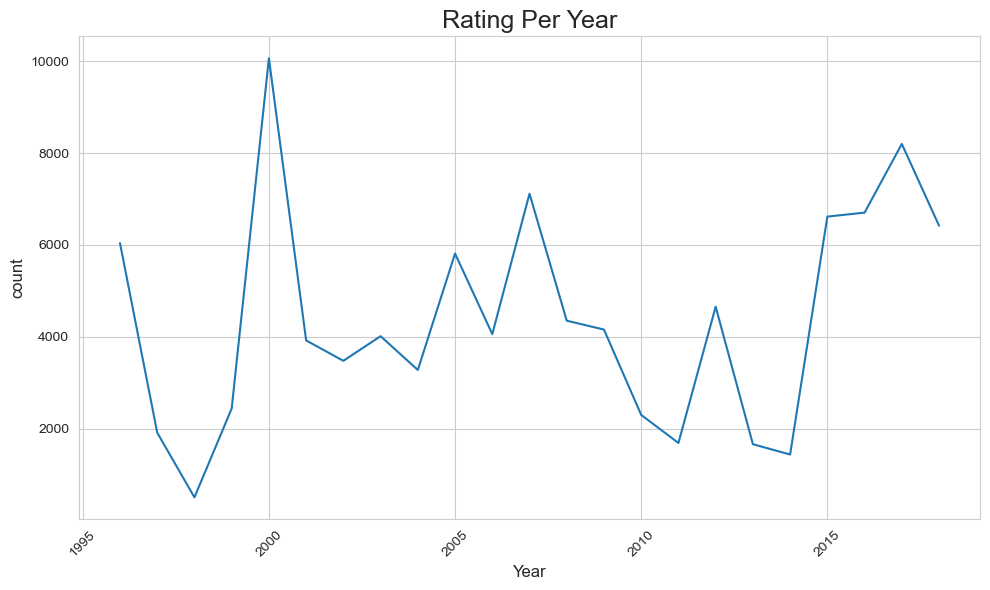

In [140]:
bivariate.execute_analysis(ratings_per_year, 'Year', 'count', plot_type='line', title='Rating Per Year')


"Year-wise rating trends show initial fluctuations, a peak in 2000, a dip through the late 2000s, and a clear recovery post-2014. These trends reflect key phases in platform engagement, possibly influenced by external factors such as user growth, feature updates, or integration with new technologies."

In [141]:
genres_count.head(2)

,genre,Number of Movies
0,Drama,4361
1,Comedy,3756


In [142]:
top_genres = genres_count.head(10)
top_genres

,genre,Number of Movies
0,Drama,4361
1,Comedy,3756
2,Thriller,1894
3,Action,1828
4,Romance,1596
5,Adventure,1263
6,Crime,1199
7,Sci-Fi,980
8,Horror,978
9,Fantasy,779


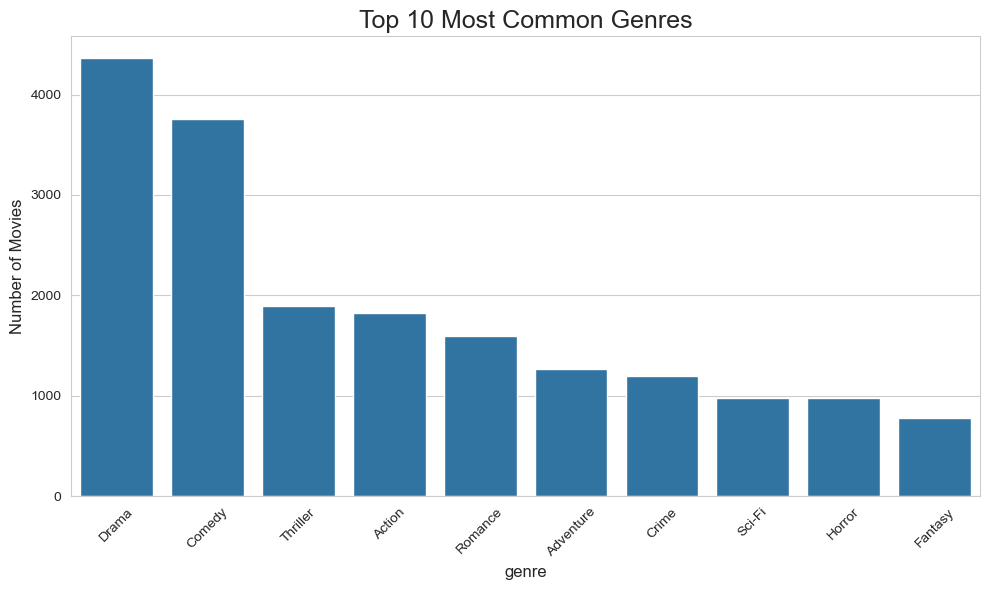

In [143]:
bivariate.execute_analysis(top_genres, 'genre', 'Number of Movies', title = 'Top 10 Most Common Genres', plot_type='bar')

In [144]:
genres_exploded

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure,114709,862.0
0,1,Toy Story (1995),Animation,114709,862.0
0,1,Toy Story (1995),Children,114709,862.0
0,1,Toy Story (1995),Comedy,114709,862.0
0,1,Toy Story (1995),Fantasy,114709,862.0
...,...,...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy,5914996,445030.0
9739,193585,Flint (2017),Drama,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,8391976,483455.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,8391976,483455.0


In [145]:
rating_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274480 entries, 0 to 274479
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     274480 non-null  int64  
 1   movieId    274480 non-null  int64  
 2   rating     274480 non-null  float64
 3   timestamp  274480 non-null  object 
 4   genres     274480 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 10.5+ MB


In [146]:
#rating_genres = ratings.merge(genres_exploded[['movieId', 'genres']], on='movieId', how='left')
rating_genre['timestamp'] = pd.to_datetime(rating_genre['timestamp'])
rating_genre['year'] = rating_genre['timestamp'].dt.year

genre_trends = rating_genre.groupby(['year', 'genres']).size().reset_index(name='count') 
genre_trends.sample(3)

,year,genres,count
316,2012,Mystery,388
164,2004,Mystery,246
183,2005,Mystery,471


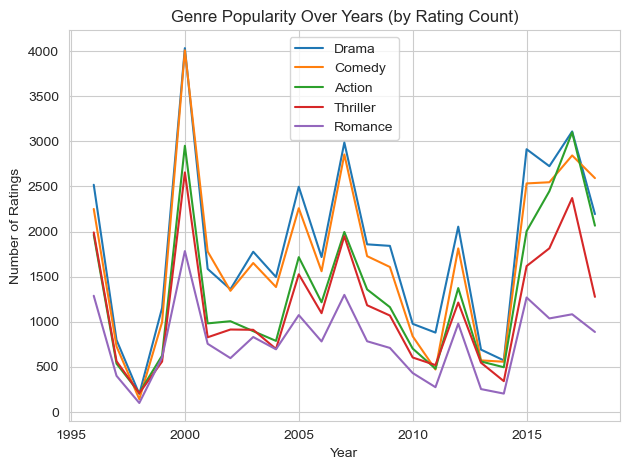

In [147]:
for genre in ['Drama', 'Comedy', 'Action', 'Thriller', 'Romance']:
    subset = genre_trends[genre_trends['genres'] == genre]
    plt.plot(subset['year'], subset['count'], label=genre)
    
plt.title('Genre Popularity Over Years (by Rating Count)')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.legend()
plt.tight_layout()
plt.show()


### Sparsity Analysis – User-Movie Ratings Matrix

In [148]:
num_user = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()

print(f"Unique User : {num_user}")
print(f"Unique movies : {num_movies}")

Unique User : 610
Unique movies : 9724


In [149]:
total_rating = len(ratings)
possible_ratings = num_user * num_movies
sparsity = 1- (total_rating / possible_ratings)

print(f"Sparsity : {sparsity:.4f} ({sparsity*100:.2f})")

Sparsity : 0.9830 (98.30)


A sparsity of ~0.9830 means 98.30% of user-movie pairs are unrated which is very common in recommendation systems.

In [150]:
user_activity = ratings.groupby('userId').size().reset_index(name='Rating count')
user_activity

,userId,Rating count
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44
...,...,...
605,606,1115
606,607,187
607,608,831
608,609,37



Descriptive Statistics for Numerical Feature: Rating count
count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: Rating count, dtype: float64


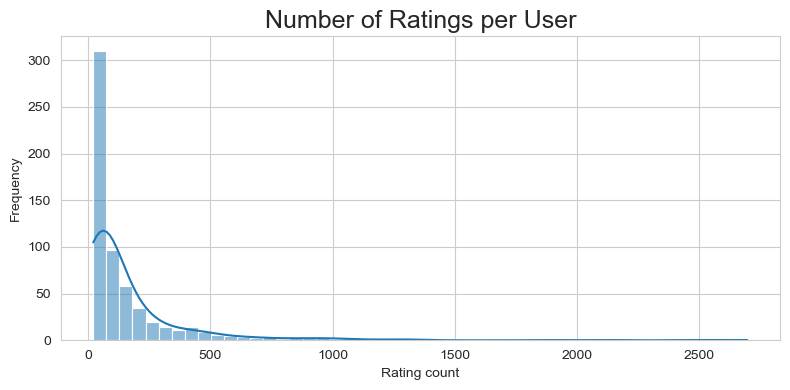

In [151]:
uni.analyze(user_activity, 'Rating count', title= 'Number of Ratings per User')

"The number of ratings per user follows a heavily right-skewed distribution. Most users rated only a small number of movies, indicating casual usage behavior, while a small group of users contributed a disproportionately large number of ratings. This suggests the presence of power users who play a significant role in the dataset’s volume."

In [152]:
movie_popularity = ratings.groupby('movieId').size().reset_index(name='Ratings count')
movie_popularity

,movieId,Ratings count
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1



Descriptive Statistics for Numerical Feature: Ratings count
count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: Ratings count, dtype: float64


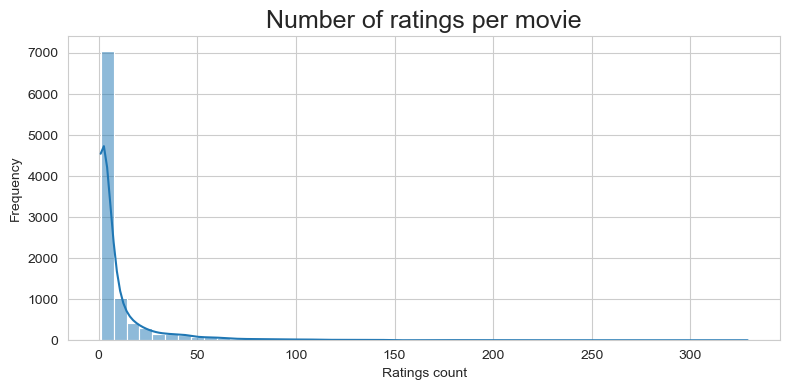

In [153]:
uni.analyze(movie_popularity, 'Ratings count', title = 'Number of ratings per movie')

"The distribution of ratings per movie is highly skewed. Most movies receive very few ratings, while only a small fraction of movies are rated frequently. This highlights the classic long-tail pattern common in user-generated platforms, where a few popular items dominate engagement."

###  Identify Cold-Start Users & Movies

Now that I have seen the "long tail" in the charts, let's put some specific numbers on it. I will identify exactly how many movies and users fall into the "cold-start" category. These are the ones with too few ratings for collaborative filtering models to work well.

I will define "cold-start" as anything with fewer than 5 ratings.

In [154]:
cold_start_user = user_activity[user_activity['Rating count']<5] 
number_of_cold_start_user = len(cold_start_user)
print(f"Percentage of cold start user : {(number_of_cold_start_user / num_user) * 100:.2f}")

Percentage of cold start user : 0.00


In [155]:
cold_start_movies = user_activity[movie_popularity['Ratings count']<5] 
number_of_cold_start_movies = len(cold_start_movies)
print(f"Percentage of cold start user : {(number_of_cold_start_movies / num_movies) * 100:.2f}")

Percentage of cold start user : 1.87


C:\Users\sarva\AppData\Local\Temp\ipykernel_17940\1972176203.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cold_start_movies = user_activity[movie_popularity['Ratings count']<5]


### Analyze Rating Biases – Per User & Per Movie 

Understanding how users rate and which movies receive high/low ratings helps detect biases or skewness in the dataset. It also helps improve the performance of normalization techniques in model training.

### MOVIE RATING COUNT VS AVERAGE RATING

In [156]:
movie_agg = movie_stats.drop(columns=['title', 'movieId'], axis=1)
movie_agg.sample(2)

,avg_rating,num_ratings
1409,4.166667,6
2339,3.071429,7


In [157]:
bivariate.set_strategy(NumericalVsNumericalAnalysis())


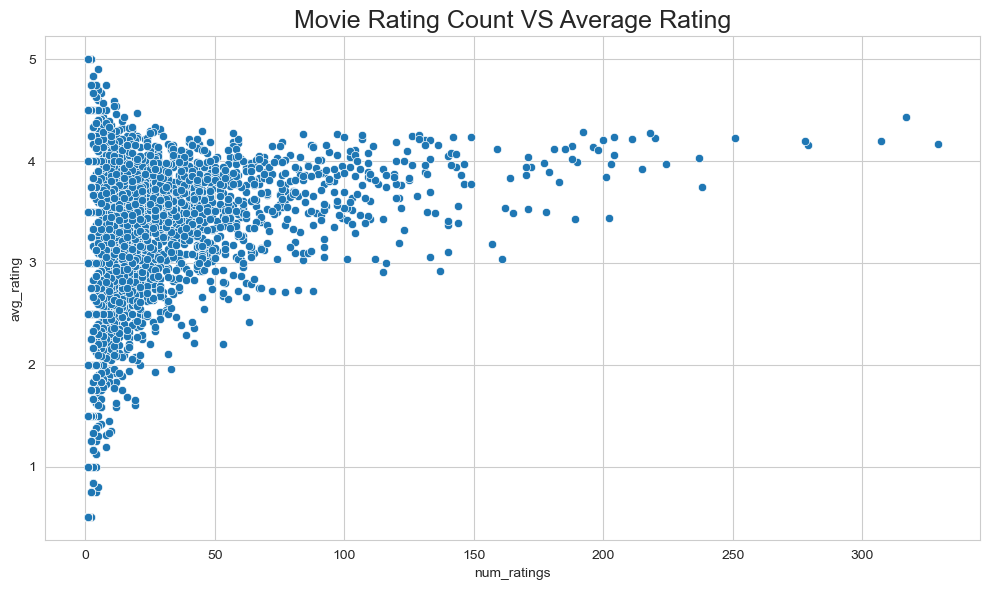

In [158]:
bivariate.execute_analysis(movie_agg, feature1='num_ratings', feature2='avg_rating', title="Movie Rating Count VS Average Rating")

 Helps us understand:

Whether highly rated movies are actually popular.

Biases in top-N recommendation lists (only popular movies getting visibility).

### Sentiment Trend Overview from Tags (Mini Textual EDA)

In [159]:
data = load_movielens()

In [160]:
tags = data['tags']
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [161]:
tags = tags.dropna(subset=['tag'])
tags=tags[tags['tag'].str.strip() != ""] #Remove rows where the 'tag' contains empty strings 

In [162]:
from collections import Counter
common_tags = Counter(tags['tag'].str.lower())

pd.DataFrame(common_tags.most_common(20), columns=['tag' , 'count'])

,tag,count
0,in netflix queue,131
1,atmospheric,41
2,funny,24
3,superhero,24
4,surreal,24
5,thought-provoking,24
6,sci-fi,23
7,disney,23
8,quirky,22
9,religion,22


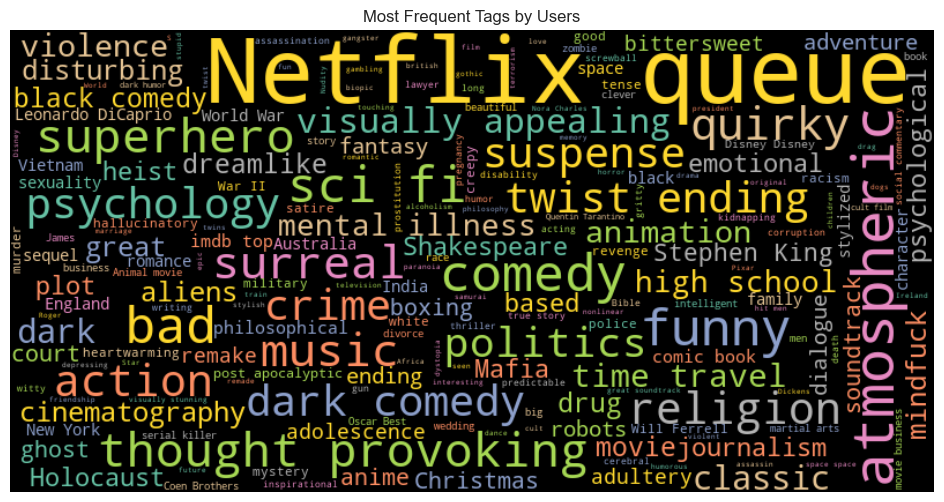

In [163]:
from wordcloud import WordCloud
all_tags = " ".join(tags['tag'].astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Set2').generate(all_tags)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Tags by Users")
plt.show()


### Simple Sentiment on Tags

In [164]:
from textblob import TextBlob

tags['sentiment'] = tags['tag'].apply(lambda x: TextBlob(x).sentiment.polarity)
tags[['tag', 'sentiment']].sample(5)


,tag,sentiment
2355,Ireland,0.00
1004,death penalty,0.00
2716,bad acting,-0.35
3333,Seann William Scott,0.00
3267,thought-provoking,0.40


In [165]:
tags.groupby('movieId')['sentiment'].mean().sort_values(ascending=False).head()

movieId
8754     1.00
8920     1.00
912      0.85
70286    0.80
1779     0.70
Name: sentiment, dtype: float64

Early signals of viewer emotion without needing full-length reviews.

Useful later to enrich cold-start movie features.

In [166]:
tags.to_csv(r"C:\Users\sarva\MoviePulse\data\processed\tags_clean.csv")

### Visualize Distribution of Sentiment vs TMDB Rating

In [167]:

full_df = pd.read_csv(r"C:\Users\sarva\MoviePulse\data\processed\movies_metadata_enriched.csv")

In [168]:
full_df.head()

,tmdbId,title,overview,tagline,genres,runtime,release_date,language,vote_average,vote_count,...,imdbId,genre_count,main_genre,avg_ratings,num_ratings,compound,neg,neu,pos,num_reviews
0,862.0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",The adventure takes off when toys come to life!,"Animation, Adventure, Family, Comedy",81.0,1995-11-22,en,7.970,18958.0,...,114709,5,Adventure,3.920930,215.0,0.9889,0.009,0.781,0.211,1.0
1,15602.0,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"Romance, Comedy",101.0,1995-12-22,en,6.461,399.0,...,113228,2,Comedy,3.259615,52.0,0.0000,0.000,1.000,0.000,1.0
2,11862.0,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just when his world is back to normal... he's ...,"Comedy, Family",106.0,1995-12-08,en,6.242,757.0,...,113041,1,Comedy,3.071429,49.0,0.0000,0.000,1.000,0.000,1.0
3,31357.0,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"Comedy, Drama, Romance",127.0,1995-12-22,en,6.300,173.0,...,114885,3,Comedy,2.357143,7.0,0.0000,0.000,1.000,0.000,1.0
4,8844.0,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"Adventure, Fantasy, Family",104.0,1995-12-15,en,7.239,10817.0,...,113497,3,Adventure,3.431818,110.0,0.8195,0.119,0.726,0.155,1.0


In [169]:
# Filter: Only movies with sentiment scores
full_df = full_df[full_df['compound'].notnull() & full_df['vote_average'].notnull()]


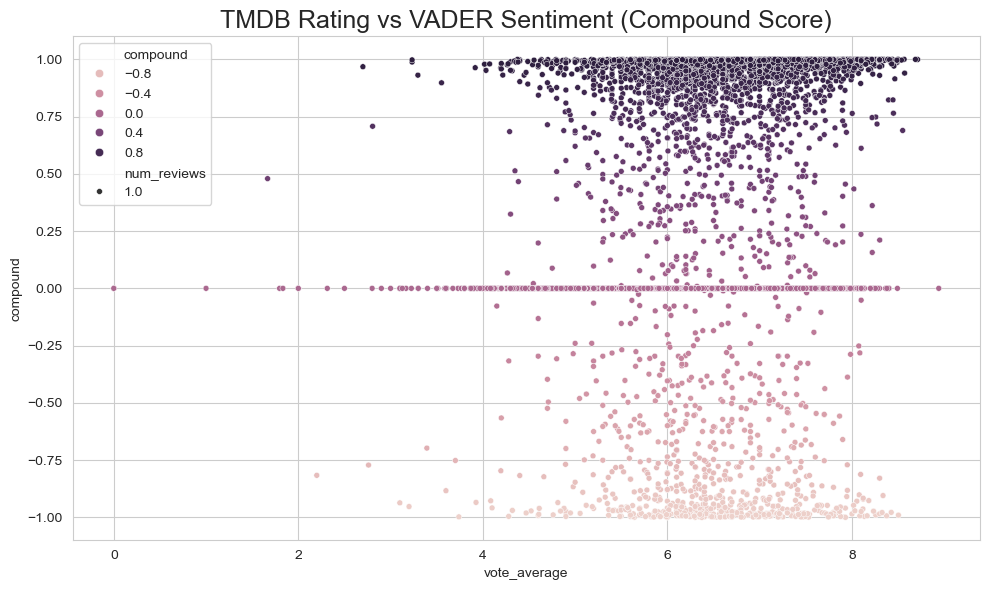

In [172]:
#bivariate.set_strategy(NumericalVsNumericalAnalysis())
bivariate.execute_analysis(full_df, 'vote_average', 'compound', title='TMDB Rating vs VADER Sentiment (Compound Score)', size='num_reviews', hue='compound')

High TMDB + high sentiment → crowd-pleasers.

Low TMDB + high sentiment → hidden gems or cult favorites.

High TMDB + low sentiment → critically liked but emotionally cold.

Large bubbles = more reviews = more reliable sentiment.

In [173]:
correlation = full_df[['compound', 'vote_average']].corr().iloc[0,1]
print(f"Correlation between TMDB rating and Sentiment: {correlation:.3f}")


Correlation between TMDB rating and Sentiment: 0.162


0.162 -> A weak positive correlation – this means that TMDB ratings and audience sentiment generally trend together, but not strongly.

In [175]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import GridSearchCV
import joblib
import os

# =============================
# CONFIG
# =============================
RATINGS_PATH = r"C:\Users\sarva\MoviePulse\data\processed\ratings_cleans.csv"
MODEL_OUTPUT_PATH = r"c:\Users\sarva\MoviePulse\model"

# =============================
# STEP 1: LOAD DATA
# =============================
print("📥 Loading ratings...")
ratings_df = pd.read_csv(RATINGS_PATH)
reader = Reader(rating_scale=(ratings_df['rating'].min(), ratings_df['rating'].max()))
data = Dataset.load_from_df(ratings_df[['userId', 'tmdbId', 'rating']], reader)

# =============================
# STEP 2: DEFINE PARAMETER GRID
# =============================
param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [10, 20],
    'lr_all': [0.002, 0.005],
    'reg_all': [0.02, 0.1]
}

# =============================
# STEP 3: PERFORM GRID SEARCH
# =============================
print("🔍 Running Grid Search (this may take a few minutes)...")
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1, joblib_verbose=1)
gs.fit(data)

# =============================
# STEP 4: PRINT BEST MODEL
# =============================
print("\n✅ Grid Search Complete!")
print("Best RMSE:", gs.best_score['rmse'])
print("Best Params:", gs.best_params['rmse'])

# =============================
# STEP 5: SAVE BEST MODEL
# =============================
best_model = gs.best_estimator['rmse']
os.makedirs(os.path.dirname(MODEL_OUTPUT_PATH), exist_ok=True)
joblib.dump(best_model, MODEL_OUTPUT_PATH)
print(f"💾 Best SVD model saved to: {MODEL_OUTPUT_PATH}")

# Optional: print a model summary
print("\n📌 Best SVD Model Summary:")
print(best_model)


📥 Loading ratings...
🔍 Running Grid Search (this may take a few minutes)...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s



✅ Grid Search Complete!
Best RMSE: 0.8751057281380049
Best Params: {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   19.6s finished


PermissionError: [Errno 13] Permission denied: 'c:\\Users\\sarva\\MoviePulse\\model'